# Optimization of Rastrigin function
Here we are implementing hill climbing and simulated annealing optimization algorithms for Rastrigin function. In the below code you culd se the Rastrigin function.

In [91]:
import numpy as np
from numpy.random import rand
from numpy import exp

from matplotlib import pyplot
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


def rastrigin(X):
    A = 10
    delta = [x**2 - A * np.cos(2 * np.pi * x) for x in X]
    y = A*len(X) + sum(delta)
    return y


bounds = (-5.12, 5.12)

dim_x = 2


# Hill Climbing Algorithm
Hill climbing algorithm starts by choosing one random solution in the search space and will then go over its neighbors and choose them only if that neighbor has better values. Choosing neighbors is done randomly and with a `step_size`.

In [92]:
def is_in_bound(value, bounds):

	for x in value:
		if bounds[0] > x or x > bounds[1]:
			return False

	return True


def generate_solution(value, dim_x, bounds, step_size):
	if value is None:
		value = (rand(dim_x) - 0.5) * 2 * bounds[1]

		while not is_in_bound(value, bounds):
			value = (rand(dim_x) - 0.5) * 2 * bounds[1]

		return value

	neighbor = value + (rand(dim_x) - 0.5) * 2 * bounds[1] * step_size

	while not is_in_bound(neighbor, bounds):
		neighbor = value + (rand(dim_x) - 0.5) * 2 * bounds[1] * step_size

	return neighbor


def hill_climbing(problem, dim_x, bounds, n_iterations, step_size):
	scores = []
	
	solution = generate_solution(None, dim_x, bounds, step_size)

	solution_eval = problem(solution)

	scores.append(solution_eval)

	print('init', solution, solution_eval)

	for epoch in range(n_iterations):
		neighbor = generate_solution(solution, dim_x, bounds, step_size)
		neighbor_eval = problem(neighbor)

		if neighbor_eval < solution_eval:
			solution = neighbor
			solution_eval = neighbor_eval
			scores.append(solution_eval)
			print(epoch+1, solution, solution_eval)

	print('final', solution, solution_eval)
	
	return scores


# Simulated Annealing Algorithm
This algorithm is similar to hill climbing algorithm. The difference here is that we evaluate do not change current solution not based on whether the answer is better or not. We change it based on the probability defined in the code. Note that this probability is based on the difference of current and neighbor evaluation and number of epochs that has finished. The chance of changing is higher if the difference between two evaluations is high (negative) or epoch is low or temp is high.

In [93]:
def simulated_annealing(problem, dim_x, bounds, n_iterations, step_size, temp):
	scores = []
	
	solution = generate_solution(None, dim_x, bounds, step_size)

	solution_eval = problem(solution)
	
	scores.append(solution_eval)
	
	print('init', solution, solution_eval)

	current, current_eval = solution, solution_eval

	for epoch in range(n_iterations):
		neighbor = generate_solution(current, dim_x, bounds, step_size)
		neighbor_eval = problem(neighbor)

		if neighbor_eval < solution_eval:
			solution = neighbor
			solution_eval = neighbor_eval
			scores.append(solution_eval)
			print(epoch+1, solution, solution_eval)

		diff = neighbor_eval - current_eval

		t = temp / float(epoch + 1)
		metropolis = exp(diff / t)

		if diff < 0 or rand() < metropolis:
			current, current_eval = neighbor, neighbor_eval

	print('final', solution, solution_eval)
	
	return scores


init [-2.90021573  3.03100216] 19.68921668083464
6 [-1.72591265  0.96030395] 15.718076568498828
11 [-2.86248378  1.10697785] 15.100733268166065
14 [-1.88386789  0.22025393] 14.285451470161304
30 [-1.92782402 -0.79588709] 12.517336281955444
34 [-0.04802872  1.06912808] 2.525771587146039
342 [ 0.03830937 -1.07255499] 2.461384838385243
685 [1.03429907 0.06135996] 2.0388893733908375
778 [ 1.00931733 -0.0218512 ] 1.1304319766439868
3292 [-0.00078028 -0.01480253] 0.04356026425762849
final [-0.00078028 -0.01480253] 0.04356026425762849


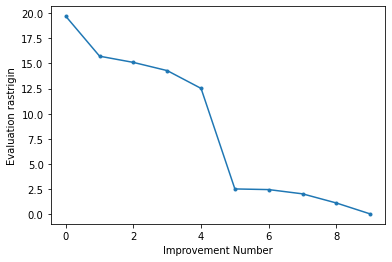

init [0.68517935 2.1479741 ] 23.0640438220657
2 [-2.9684115   0.07353165] 10.061622343167262
90 [-2.05129052  0.15212552] 8.976452161358072
136 [-0.9518137   1.89324569] 7.111653799320145
139 [0.95756337 0.8995598 ] 4.005629707266014
448 [-1.05072767 -0.95194383] 2.966291851823577
844 [-0.94595401 -0.99840401] 2.4631990239708053
1528 [-0.09621925  0.00013254] 1.781757937848358
1677 [-1.02223254 -0.04311324] 1.5088924133233874
1694 [-1.03876321  0.02423922] 1.4905036093927464
1969 [-0.03060305  0.978691  ] 1.2325672496402937
2611 [-0.0123643   1.00078521] 1.0320069204715594
9361 [0.05608677 0.03445802] 0.8523352924637209
final [0.05608677 0.03445802] 0.8523352924637209


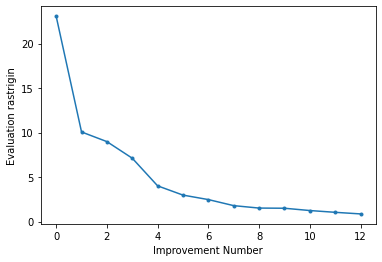

init [ 0.94463915 -4.48443657] 41.55363674140039
1 [ 0.04418703 -3.72451609] 25.851278346039933
3 [-0.94270277 -3.76143782] 24.960125732882553
4 [-1.0066622 -3.8741925] 18.996395665806595
48 [-1.21136159 -2.92556342] 18.69629147212348
52 [-0.21724091 -3.01364166] 17.12212989270764
55 [ 0.05886963 -2.99282312] 9.646945702365832
71 [-0.0499176  -2.02978536] 4.784966049859271
139 [-1.01407225 -1.05513974] 2.774896219097272
254 [ 0.00263036 -0.95178258] 1.362683951668913
310 [-0.02311075 -0.00146421] 0.10620278025164964
6324 [0.00965459 0.01703834] 0.07602624818611758
final [0.00965459 0.01703834] 0.07602624818611758


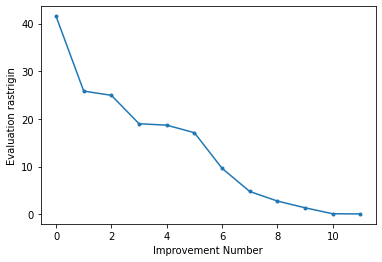

In [94]:
scores = hill_climbing(rastrigin, dim_x, bounds, 10000, 0.5)

pyplot.plot(scores, '.-')
pyplot.xlabel('Improvement Number')
pyplot.ylabel('Evaluation rastrigin')
pyplot.show()

scores = hill_climbing(rastrigin, dim_x, bounds, 10000, 0.8)

pyplot.plot(scores, '.-')
pyplot.xlabel('Improvement Number')
pyplot.ylabel('Evaluation rastrigin')
pyplot.show()

scores = hill_climbing(rastrigin, dim_x, bounds, 10000, 0.2)

pyplot.plot(scores, '.-')
pyplot.xlabel('Improvement Number')
pyplot.ylabel('Evaluation rastrigin')
pyplot.show()


init [-3.50932406 -3.65541466] 61.25952184449423
1 [-4.16274771 -1.6903327 ] 38.635785708075
3 [-3.39353601  0.9142446 ] 31.613605445889473
4 [-2.43250649 -1.03667402] 26.370297767245575
7 [-1.6934933  -2.08903022] 22.232493118076533
25 [-1.92604939 -0.87245433] 8.573970553689204
61 [-1.94505976  1.091985  ] 7.189814546797422
134 [-0.9516885  -0.14877109] 5.4448857009029545
138 [-0.91299591  0.96822207] 3.427047256530116
145 [-0.09868152 -0.01979089] 1.9487591747077886
1220 [-9.50384769e-01  1.01006198e-04] 1.3852251515334046
3899 [0.02552072 0.05573978] 0.7390849121142118
final [0.02552072 0.05573978] 0.7390849121142118


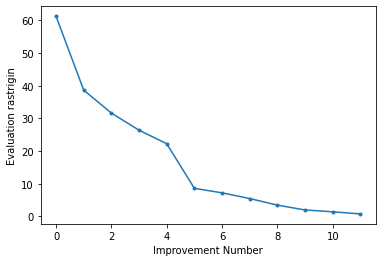

init [-0.01748767  3.26375771] 21.57607226735753
4 [2.15183493 1.16397881] 15.055512682910662
14 [ 0.96600556 -2.09226525] 7.171822888306531
57 [ 0.11884915 -1.08679343] 5.306736322728227
138 [-0.08313094 -0.87325452] 5.109784415295223
290 [-1.0560811   0.91530918] 3.950224095981799
421 [0.00393415 0.00836193] 0.01693925350547687
final [0.00393415 0.00836193] 0.01693925350547687


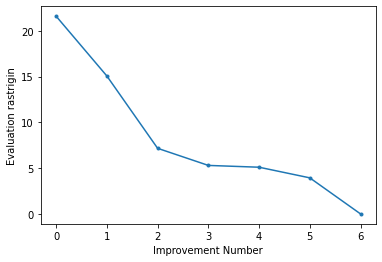

init [ 3.67662021 -1.0965967 ] 30.955026384110532
1 [ 3.2163602  -2.10626141] 24.830636682969455
13 [ 3.09688141 -0.86480041] 15.531063441575137
36 [ 2.16065331 -0.87535194] 13.02441277184153
80 [1.08932459 2.92468937] 12.373306187156718
117 [0.11289568 0.86138837] 6.725634149263957
119 [-1.04511146  0.96328452] 2.6841061945016804
730 [0.01193732 0.0484297 ] 0.49001215166155987
4364 [-0.03297712  0.02970454] 0.3895308306553602
8208 [ 0.04410325 -0.00155286] 0.3839196089567025
final [ 0.04410325 -0.00155286] 0.3839196089567025


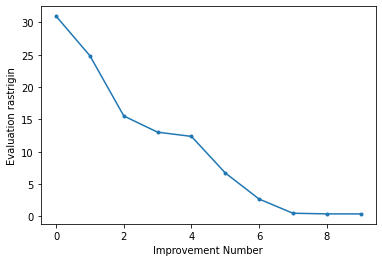

In [95]:

scores = simulated_annealing(rastrigin, dim_x, bounds, 10000, 0.5, 30)

pyplot.plot(scores, '.-')
pyplot.xlabel('Improvement Number')
pyplot.ylabel('Evaluation rastrigin')
pyplot.show()

scores = simulated_annealing(rastrigin, dim_x, bounds, 10000, 0.8, 30)

pyplot.plot(scores, '.-')
pyplot.xlabel('Improvement Number')
pyplot.ylabel('Evaluation rastrigin')
pyplot.show()

scores = simulated_annealing(rastrigin, dim_x, bounds, 10000, 0.2, 30)

pyplot.plot(scores, '.-')
pyplot.xlabel('Improvement Number')
pyplot.ylabel('Evaluation rastrigin')
pyplot.show()


# Compare
As you could see, simulated annealing resulted in better answer with a higher step size and hill climbing resulted in better result with a moderated step size. 